<a href="https://colab.research.google.com/github/thiagolopes97/ITA/blob/main/Aula2_RegLin_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 2 - Regressão Linear e Regressão Logística**

---

# Fundamento da Regressão Linear e Logística

---

O modelo linear é uma modelo que utiliza commbinações lineares das características da base de dados. Este por sua vez é definindo como [1,2]:
$$\hat{f}(\mathbf{x},\mathbf{w})=w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n  $$
no qual $\hat{f}$ é a função aproximadora do método, $n$ o número de características, $w = (w_1 , ..., w_n )$ o vetor
com os coeficientes (ou pesos dos atributos) e $w_0$ é o termo escalar.

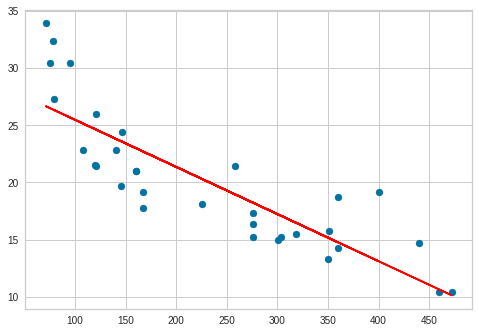


Existem diversos modelos lineares distintos, cada qual com sua especificidade e parâmetro distinto. Consultar [Linear Models](<https://scikit-learn.org/stable/modules/linear_model.html>) [2].

A qualidade de um estimador em fazer previsões é mediada por uma função de custo, que avalia o quão bem uma estimativa se aproxima do esperado [3,4]. A função
de custo é usada para aprimorar o modelo, que tende a minimizá-la [3]. 

Por mais que cada algoritmo possa possuir uma função de custo, em problemas de regressão geralmente ela está associada ao erro quadrático médio, representado abaixo [4]:
$$ MSE\left ( \hat{f} \right ) = \frac{1}{n} \sum_{i=1}^{n}\left ( y_i - \hat{f}(\mathbf{x}_i) \right )^2$$

no qual $n$ é o número de entradas do conjunto avaliado, $y_i$ é o valor real e $\hat{f}(\mathbf{x}_i)$ o valor previsto pelo modelo.

O $MSE$ está vinculado com o $RSME$, que é a medida de desempenho típica em problemas de regressão [3]. O $RSME$ é para quantificar os erros de um modelo de ML em suas previsões, dando um peso maior aos
grandes erros [1]. 
$$RMSE(\hat{f})=\sqrt{MSE(\hat{f})} $$

Outra medida de desempenho empregada nesta projeto é o coeficiente de determinação $R^2$, que representa a proporção de variância explicada pelas variáveis[3,4]. Assim, o $R^2$ explica o quão bem as amostras nunca vistas pelos modelos serão previstas por ele. A expressão abaixo representa como o $R^2$ é calculado normalmente:
$$R^{2}\left ( y, \hat{f} \right ) = 1 - \frac{\sum_{i=1}^{n}\left ( y_i - \hat{f}\left ( \mathbf{x}_i \right ) \right )^2}{\sum_{i=1}^{n}\left ( y_i - \overline{y} \right )^2}$$

no qual $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$.

Já na regressão logística o modelo calcula a soma ponderada das características de entrada e soma-os a um termo olarizador ($w_0$) [5]. Esta função calcula a probabilidade em formato de uma função logística. Matematicamente, este modelo é descrito por [1]:
$$ \hat{f}(\mathbf{x},\mathbf{w}) = \sigma (\mathbf{x}.\mathbf{w})$$

sendo $\mathbf{w}.\mathbf{x}$ é o produto escalar
entre o o vetor de pesos e de características e $\sigma$ a função logística descrita por $\sigma(x) = \frac{1}{1+e^{-x}}$.

Diferente dos modelos de regressão comum, a Reg. Logística é utilizada como um classificador. Identificando ou não a probabilidade de determinado valor pertencer a uma classe. 
No caso de problemas de classificação, onde é necessário associar um conjunto de dados a um rótulo específico, não podemos utilizar as métricas usuais de regeessão, pois não são valores numéricos e classes. Para isso, utilizamos a Matriz de Confusão, que associa os valores que foram encontrados de maneira correta ou não.


![Matriz de confusão](https://miro.medium.com/max/938/1*s7VB26Cfo1LdVZcLou-e0g.png)

**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Linear Models**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/linear_model.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Regressão Linear - Preço de casas em Boston

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


# Normalmente as estruturas a serem analisadas veem em um formato CSV, EXCEL - Estes casos são mais fáceis de
# lidar e será mostrado seus procedimentos posteriormente.
dataset = load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [2]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
dataset.get('data')

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
# df = DataFrame
df = pd.DataFrame(dataset.get('data'))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Nomear as colunas do Dataframde
df.columns = dataset.get('feature_names')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
#Adicionar uma coluna ao Dataframe
df['target'] = dataset.get('target')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Separar os valores de atributo e alvo

X = df[['AGE']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# Chamar a função do Modelo

LinReg = LinearRegression()
print(LinReg)
print(type(LinReg))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<class 'sklearn.linear_model._base.LinearRegression'>


In [9]:
# Treinar o modelo

LinReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Preizer os valores de teste

y_pred = LinReg.predict(X_test)
print(y_pred)

[22.9740483  21.53822337 19.16495902 19.47348339 26.78313757 25.44224321
 23.76909185 20.39905648 28.05283399 28.1121656  23.47243381 19.865072
 20.58891763 22.62992497 22.3214006  20.11426476 18.96323155 21.34836222
 22.36886589 19.50908235 21.43142647 19.72267614 24.6709323  19.84133936
 23.5792307  21.24156532 20.47025441 23.53176542 21.70435187 26.08302459
 18.96323155 28.36135836 28.56308582 19.75827511 21.6094213  19.17682534
 20.56518499 19.6989435  21.34836222 23.49616645 19.35482017 27.54258216
 18.96323155 22.00100991 28.44442261 24.55226908 20.86184303 27.54258216
 21.6094213  20.99237257 24.44547219 19.39041914 19.50908235 25.07438724
 27.70871066 19.4260181  19.58028028 19.1530927  19.09376109 23.44870116
 18.96323155 24.38614058 21.00423889 29.01400605 19.35482017 21.13476843
 23.53176542 23.34190427 21.75181716 22.49939543 20.45838809 20.14986373
 27.4595179  28.18336353 18.96323155 18.96323155 20.80251142 18.96323155
 22.85538508 24.1250815  26.59327642 26.77127125 28.7

In [11]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 5.506554124943928
RMSE: 53.82805138453363
R²: 0.19762108634094544


In [12]:
y_pred_total = LinReg.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


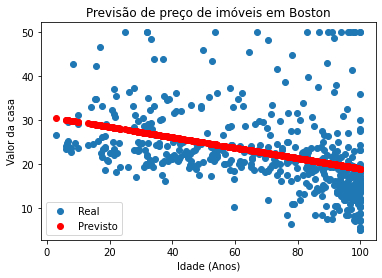

In [13]:
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


In [14]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

MSE: 3.6103414748029996
RMSE: 28.491495451364948
R²: 0.695052591825709


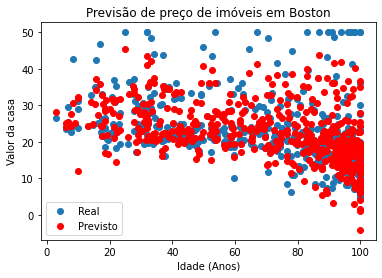

In [15]:
# Chamar a função do Modelo

LinReg = LinearRegression()

# Treinar o modelo

LinReg.fit(X_train,y_train)


# Preizer os valores de teste

y_pred = LinReg.predict(X_test)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

y_pred_total = LinReg.predict(X)
plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()




# Regressão Linear - Qualidade do Vinho

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/thiagolopes97/ITA/main/dataset/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
#Divisão do dataset em Atributos e Resultado
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']
X = df[feature_cols]
y = df['quality']


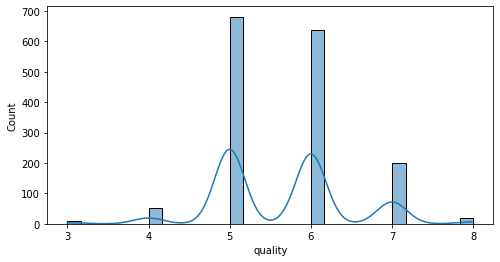

In [21]:
# Plotagem do histograma de qualidade

plt.figure(figsize=(8,4))
plt.tight_layout()
sns.histplot(df['quality'],kde=True)

plt.show()

In [22]:
# Separação do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Treinamento do Dataset
regressor = LinearRegression()  
regressor.fit(X_train, y_train);

In [23]:
# Plotagem da influência de cada variável em relação a qualidade do vinho (coeficiente angular)
# Nota: Para cada uma unidada de mudança no atributo, haverá uma mudança na qualidade do vinho de 
# acordo com o coeficiente. Por exemplo, se mudar 1 unidade de densidade, a qualidade do vinho 
# irá mudar -31.5166.

coeff_df = pd.DataFrame(regressor.coef_, feature_cols, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [24]:
y_pred = regressor.predict(X_test)
# Cria a tabela de resultados real e resultado previsto
df_comp = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
df_comp.sample(5)

,Real,Previsto
170,4,4.690601
1186,5,5.831684
227,5,5.146352
517,3,4.822199
108,6,5.592078


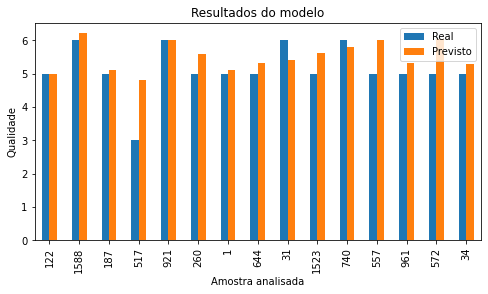

In [45]:
df_comp.sample(15).plot(kind='bar',figsize=(8,4))
plt.title('Resultados do modelo')
plt.xlabel('Amostra analisada')
plt.ylabel('Qualidade')
plt.show()

In [26]:
# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 0.46963309286611105
RMSE: 0.3844711978201246
R²: 0.32838876395802175


In [27]:
# Calcular as métricas do modelo

y_pred = y_pred.round()
print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

MSE: 0.396875
RMSE: 0.453125
R²: 0.20846127601501196


# Regressão Logística - Candidatos a Eleição

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/dataset/eleicao.csv")
df.head()

,CANDIDATO;SITUACAO;DESPESAS
0,George Turner;0;10
1,Victor Johnson;0;100
2,Jerry Perry;1;1600
3,Shirley Cook;1;1500
4,Carolyn Bailey;1;3300


In [30]:
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/dataset/eleicao.csv",sep=";")
df.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CANDIDATO  47 non-null     object
 1   SITUACAO   47 non-null     int64 
 2   DESPESAS   47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


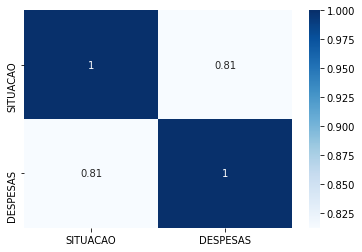

In [32]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

plt.show()

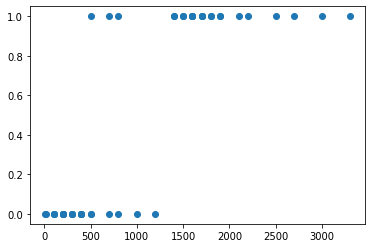

In [33]:
plt.scatter(df.DESPESAS, df.SITUACAO)

In [34]:
X = df['DESPESAS'].values.reshape(-1,1)
y = df['SITUACAO']

X_train, X_test, y_train, y_teste = train_test_split(X,y,test_size=0.1)

In [35]:
modelo = LogisticRegression()
modelo.fit(X_train,y_train)
print(modelo.coef_)
print(modelo.intercept_)

[[0.00592278]]
[-4.93023611]


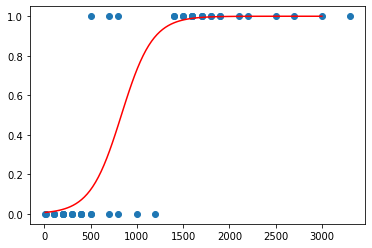

In [36]:
def model(x):
    return 1/ (1+np.exp(-x))
plt.scatter(X,y)
X_teste = np.linspace(10,3000, 100)
r = model(X_teste*modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r,color='red')

# Regressão Logística - Diabetes

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
'''Sobre o dataset: Esse dataset foi obtido pelo National Institute pf Diabetes and Digestive and Kidney Diseases.
O dataset recolheu diversos dados da população indígena para treinar um algoritmo tentando prever se o indivíduo
terá ou não diabetes. No caso deste datase, todas as pacientes são mulheres acima de 21 anos. '''
# load do dataset
df = pd.read_csv("https://raw.githubusercontent.com/thiagolopes97/ITA/main/dataset/diabetes.csv")
df.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


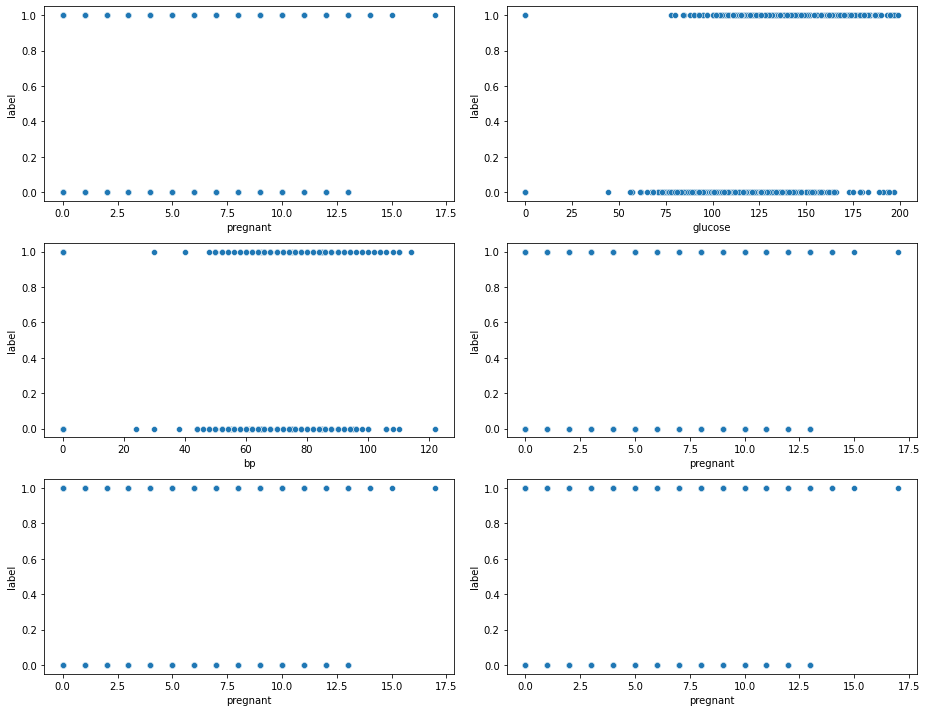

In [39]:
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.scatterplot(x='pregnant',y='label', data=df)

plt.subplot(3,2,2)
sns.scatterplot(x='glucose',y='label', data=df)

plt.subplot(3,2,3)
sns.scatterplot(x='bp',y='label', data=df)

plt.subplot(3,2,4)
sns.scatterplot(x='pregnant',y='label', data=df)

plt.subplot(3,2,5)
sns.scatterplot(x='pregnant',y='label', data=df)

plt.subplot(3,2,6)
sns.scatterplot(x='pregnant',y='label', data=df)

plt.tight_layout()
plt.show()

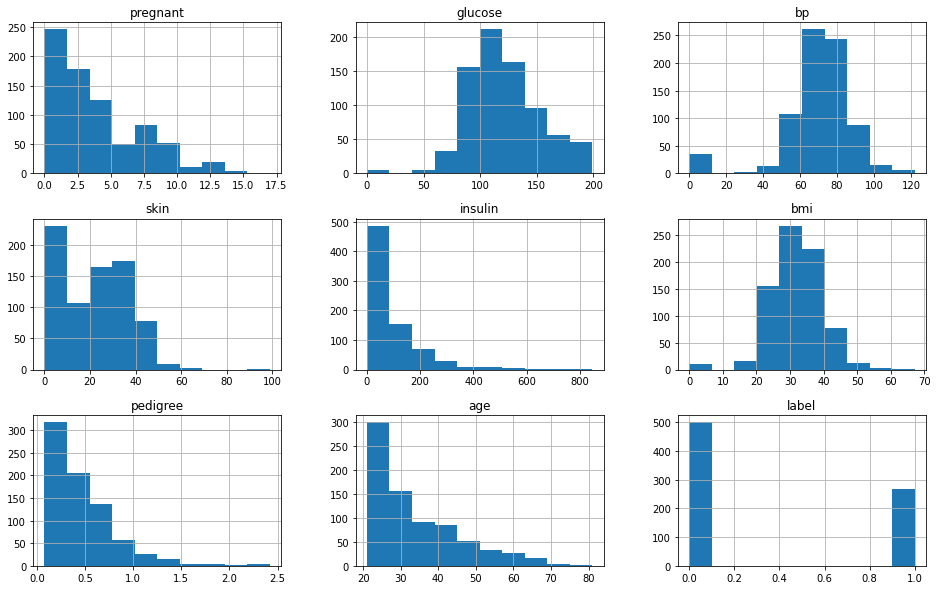

In [40]:
df.hist(figsize=(16,10));

In [41]:
#Divisão do dataset em atributos e resultado
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols]
y = df['label']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [42]:
logreg = LogisticRegression()

# Treinando nosso modelo logístico
logreg.fit(X_train,y_train)

# Testeando a predição
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
# Criando a matrix de confusão para análise de eficiência
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[84, 12],
       [24, 34]])

Text(0.5, 257.44, 'Valor previsto')

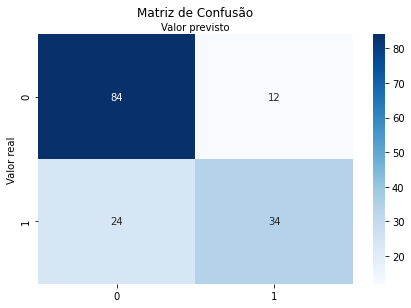

In [44]:
# Plotagem da matriz de confusão e um Heatmap

class_names=[0,1] #  Nome das classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creando o heatmap com a matriz de confusão
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor previsto')